In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url ='https://www.google.com/flights/explore/#explore;f=JFK,EWR,LGA;t=r-Europe-0x46ed8886cfadda85%253A0x72ef99e6b3fcf079;li=3;lx=5;d=2018-01-13'
driver = webdriver.PhantomJS()
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.84 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap,service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)

//anaconda/lib/python3.5/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '
//anaconda/lib/python3.5/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [5]:
driver.save_screenshot(r'flight_explorer.png')

True

In [7]:
s = BeautifulSoup(driver.page_source, 'lxml')

In [15]:
best_price_tags = s.findAll('div', 'CTPFVNB-w-e')
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$','').replace(',','')))

In [18]:
best_price_tags

[<div class="CTPFVNB-w-e" style="top: 52.73721943048576px;">$300</div>,
 <div class="CTPFVNB-w-e" style="top: 55.551998223096575px;">$300</div>,
 <div class="CTPFVNB-w-e" style="top: 54.80475278131088px;">$300</div>,
 <div class="CTPFVNB-w-e" style="top: 52.46010338266741px;">$300</div>,
 <div class="CTPFVNB-w-e" style="top: 49.29502684799518px;">$320</div>,
 <div class="CTPFVNB-w-e" style="top: 53.09725341671437px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 39.87544954128441px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 22.42712490906588px;">$401</div>,
 <div class="CTPFVNB-w-e" style="top: 39.02392453115738px;">$501</div>,
 <div class="CTPFVNB-w-e" style="top: 24.70862116011547px;">$534</div>]

In [19]:
best_price = best_prices[0]
best_price

300

In [20]:
best_height_tags = s.findAll('div', 'CTPFVNB-w-f')
best_heights = []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style']\
          .split('height:')[1].replace('px;','')))

best_height = best_heights[0]
best_height

53.26278056951424

In [21]:
pph = np.array(best_price) / np.array(best_height)
pph

5.6324509684293416

In [22]:
cities = s.findAll('div', 'CTPFVNB-w-o')
cities

[<div class="CTPFVNB-w-o CTPFVNB-w-b"><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 0px; height: 99.32572864321608px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 6px; height: 97.65671691792295px;"></div><div class="CTPFVNB-w-x" style="left: 12px; height: 92.32475711892798px;"></div><div class="CTPFVNB-w-x" style="left: 18px; height: 72.7937688442211px;"></div><div class="CTPFVNB-w-x" style="left: 24px; height: 67.46713567839197px;"></div><div class="CTPFVNB-w-x" style="left: 30px; height: 62.14050251256282px;"></div><div class="CTPFVNB-w-x" style="left: 36px; height: 62.14050251256282px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 42px; height: 71.01822445561139px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 48px; height: 67.46713567839197px;"></div><div class="CTPFVNB-w-x" style="left: 54px; height: 62.14050251256282px;"></div><div class="CTPFVNB-w-x" style="left: 60px; height: 62.14050251256282px;"></div><div class="CTPFVNB-w-x" style="left:

In [24]:
hlist = []
for bar in cities[0].findAll('div', 'CTPFVNB-w-x'):
    hlist.append(float(bar['style'].split('height: ')[1].replace('px;',''))*pph)

In [25]:
fares = pd.DataFrame(hlist, columns=['price'])
fares

,price
0,559.447296
1,550.046670
2,520.014668
3,410.007334
4,380.005334
5,350.003334
6,350.003334
7,400.006667
8,380.005334
9,350.003334


In [28]:
fares.describe()

,price
count,60.000000
mean,379.264284
std,66.482256
min,300.000000
25%,341.022735
50%,360.004000
75%,394.021268
max,597.039803


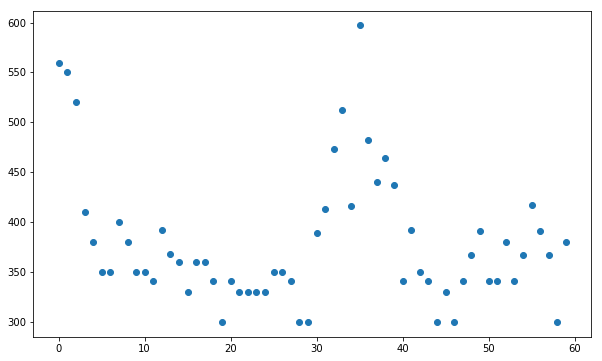

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price'])

In [30]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns=['fare']).reset_index()

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=.5, min_samples=1).fit(X)

In [33]:
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)

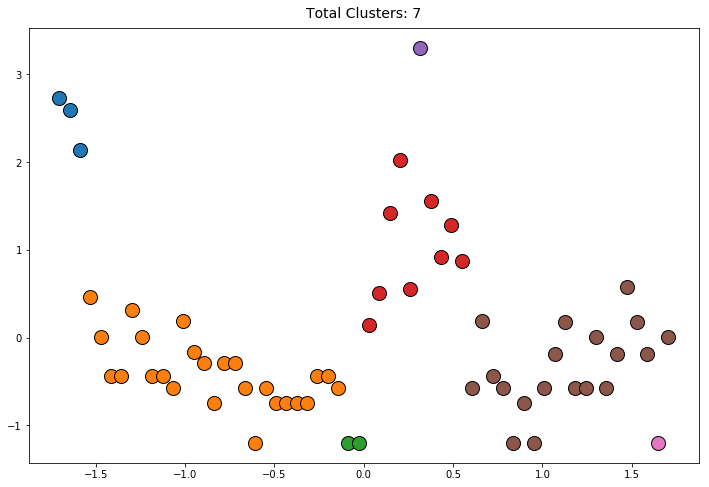

In [82]:
plt.subplots(figsize=(12,8))
for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1],'o', markeredgecolor='k', markersize=14)
plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)

In [83]:
px[10]

350.0033335555704

In [84]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    ff = pd.DataFrame(data_series, columns=['fare']).reset_index()
    X = StandardScaler().fit_transform(ff)
    db = DBSCAN(eps=eps_val, min_samples=1).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    
    plt.subplots(figsize=(12,8))
    
    for k in unique_labels:
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1],'o', markeredgecolor='k', markersize=14)
    plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)

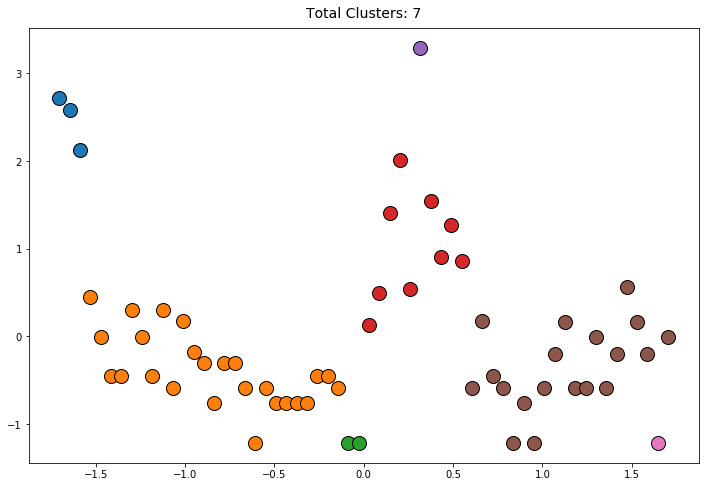

In [87]:
test_clusters(px, 0.5 , 10, 400)

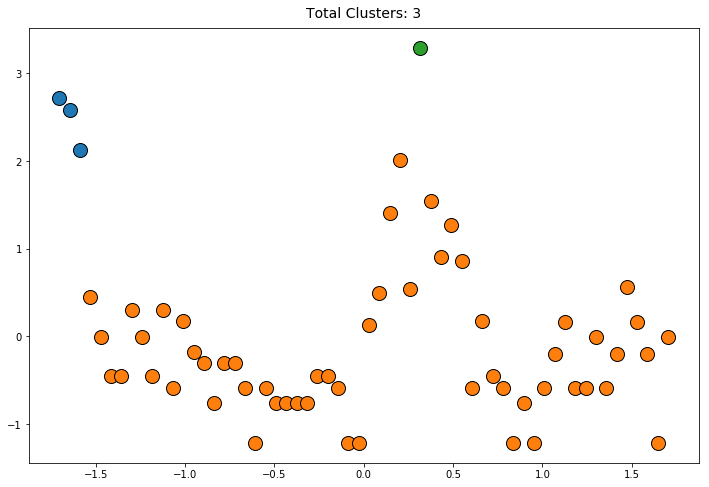

In [88]:
test_clusters(px, 1 , 10, 400)

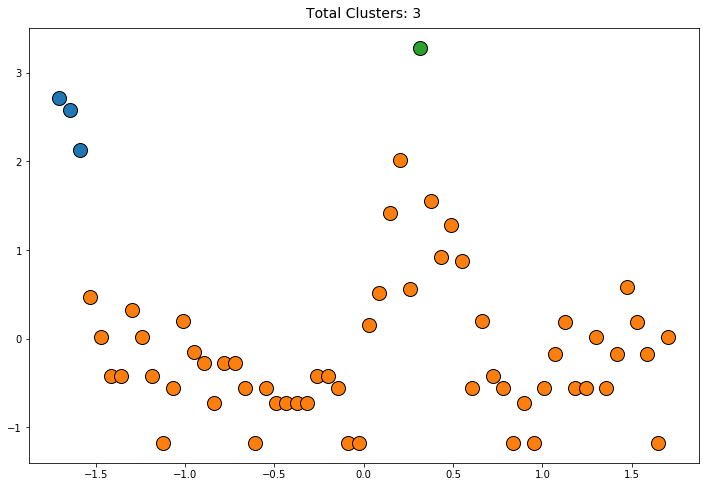

In [89]:
test_clusters(px, 1 , 10, 300)

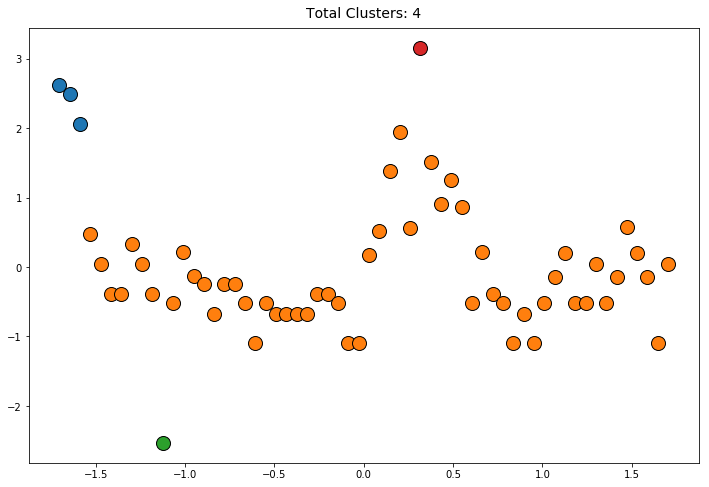

In [90]:
test_clusters(px, 1 , 10, 200)

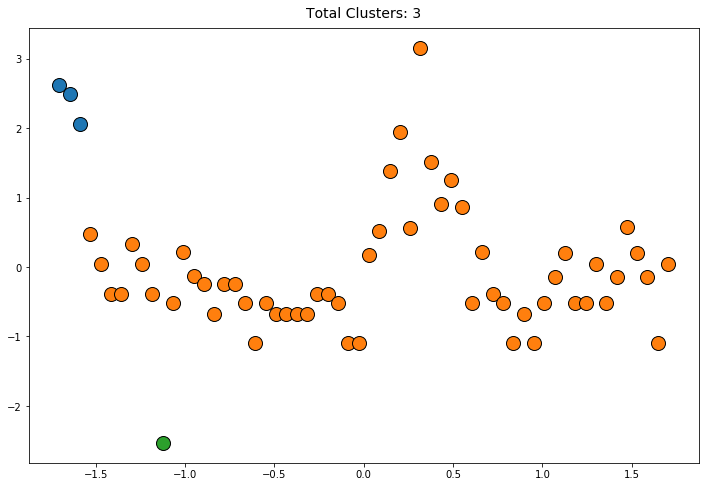

In [91]:
test_clusters(px, 1.5 , 10, 200)

In [92]:
px[45]

330.0020001333422

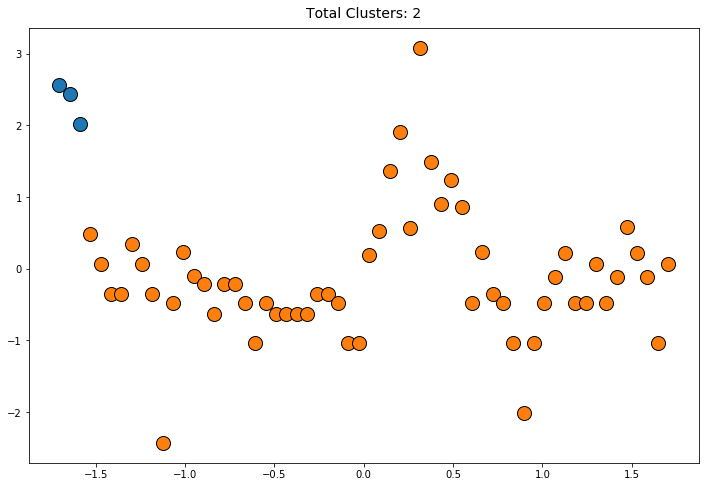

In [93]:
test_clusters(px, 1.5 , 45, 230)

In [94]:
px[55]

417.0278018534569

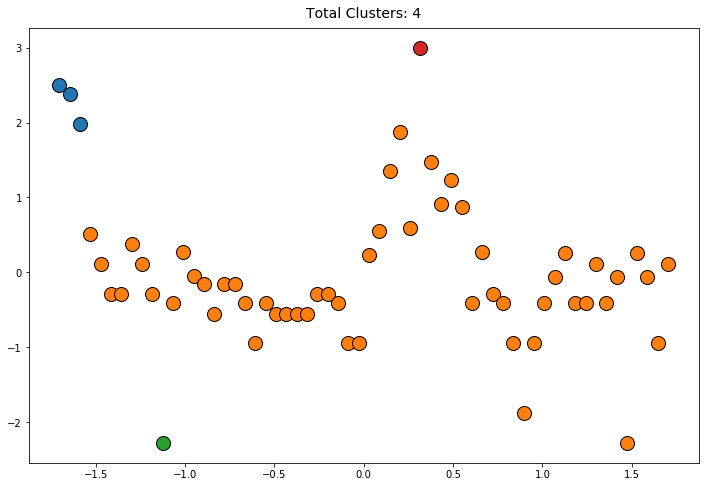

In [95]:
test_clusters(px, 1 , 55 , 200)

In [96]:
pf = pd.concat([ff, pd.DataFrame(db.labels_,columns=['cluster'])], axis=1)
pf

,index,fare,cluster
0,0,559.447296,0
1,1,550.046670,0
2,2,520.014668,0
3,3,410.007334,1
4,4,380.005334,1
5,5,350.003334,1
6,6,350.003334,1
7,7,400.006667,1
8,8,380.005334,1
9,9,350.003334,1


In [97]:
rf = pf.groupby('cluster')['fare'].agg(['min','count'])
rf

,min,count
cluster,,
0,520.014668,3
1,300.000000,25
2,300.000000,2
3,389.025935,9
4,597.039803,1
5,300.000000,19
6,300.000000,1


In [98]:
rf.describe()

,min,count
count,7.000000,7.000000
mean,386.582915,8.571429
std,123.887386,9.727232
min,300.000000,1.000000
25%,300.000000,1.500000
50%,300.000000,3.000000
75%,454.520301,14.000000
max,597.039803,25.000000


In [100]:
import schedule 
import time